In [1]:
import numpy as np
# (NOTE) release solver in latticega.py file
from latticegas import LatticeGas as latgas

In [2]:
# 5 - 1 variant
# 10 - 2 variant
# 15 - 3 variant
# 20 - 4 varinat
N = 15

In [3]:
n_x = 420
n_y = 180

n_step = 1_000
step_frame = 1

xc = int(n_x/4)
yc = int(n_y/2)
r = int(n_y/9)

u_lb_min = 0.01
u_lb_max = 0.1
Re_min = 20
Re_max = 1000

xc, yc, r

(105, 90, 20)

In [4]:
u_lb = u_lb_min + 6*(u_lb_max - u_lb_min)/(N-1)
Re = int(Re_min + 6*(Re_max - Re_min)/(N-1))

u_lb, Re

(0.04857142857142858, 440)

In [5]:
parametrs = {'nx':n_x, 'ny':n_y, 'u_lb':u_lb, 'Re':Re}
obstacle = {'xc':xc, 'yc':yc, 'r':r}

## CPU calculate

In [6]:
model = latgas(parametrs, obstacle)

In [7]:
%%time
model.solve(n_step, step_frame)

Starting simulation for 1000 steps...
Parameters: nx=420, ny=180, u_lb=0.0486, Re=440
Viscosity: nu=0.002208, Relaxation: w=1.973853
Progress: 0.0% - Max velocity: 0.0486
Progress: 10.0% - Max velocity: 0.1988
Progress: 20.0% - Max velocity: 0.1828
Progress: 30.0% - Max velocity: 0.3936
Progress: 40.0% - Max velocity: 0.3541
Progress: 50.0% - Max velocity: 0.3641
Progress: 60.0% - Max velocity: 0.4215
Progress: 70.0% - Max velocity: 0.4913
Progress: 80.0% - Max velocity: 7921.2065
Progress: 90.0% - Max velocity: 6498.7054
Simulation completed!
CPU times: total: 39 s
Wall time: 39.3 s


In [8]:
density = np.array(model.field_den)
velocity = np.array(model.field_u)
pressure = np.array(model.field_p)
# u_x = np.array(model.field_ux)
# u_y = np.array(model.field_uy)

In [9]:
np.save('data/density_zen', density)
np.save('data/velocity_zen', velocity)
np.save('data/pressure_zen', pressure)
# np.save('data/ux', u_x)
# np.save('data/uy', u_y)

### Vizualization

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
den = np.load('data/density_zen.npy')
vel = np.load('data/velocity_zen.npy')
pres = np.load('data/pressure_zen.npy')
# ux = np.load('data/ux.npy')
# uy = np.load('data/uy.npy')

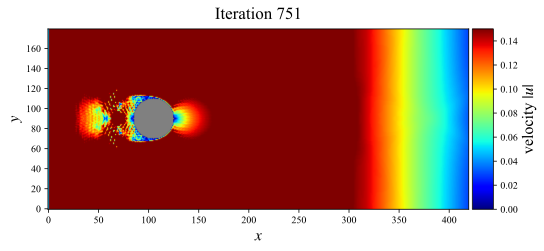

In [14]:
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

from IPython.display import clear_output
import time

# Создаем маску препятствия один раз
obstacle_mask = np.zeros((model.nx, model.ny), dtype=bool)
obstacle_mask[model.obstacle['x'], model.obstacle['y']] = True
obst = obstacle_mask.T

for j in range(0, min(n_step, len(vel)), 250):
    i = j
    
    # Очищаем вывод
    clear_output(wait=True)
    
    # Создаем новую фигуру
    fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
    divider = make_axes_locatable(ax)
    
    # Получаем данные
    velocity = vel[i].T.copy()
    velocity[obst] = np.nan
    
    # Визуализируем
    im = ax.imshow(velocity, cmap="jet", vmin=0, vmax=0.15)
    ax.invert_yaxis()
    ax.set_title(f'Iteration {(i+1)*step_frame}', fontsize=fs+1, pad=10)
    ax.set_xlabel(r'$x$', fontsize=fs)
    ax.set_ylabel(r'$y$', fontsize=fs)
    ax.set_facecolor("grey")
    
    # Добавляем цветовую шкалу
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = fig.colorbar(im, cax=cax, orientation='vertical')
    cb.set_label(r"velocity $|u|$", fontsize=fs)
    
    # Показываем график
    plt.show()
    
    # Пауза
    time.sleep(0.01)

In [15]:
fig.savefig(f"data/velocity_{(i+1)*step_frame}.jpg")